## Load the dataset

In [2]:
import numpy as np
import pandas as pd
import gzip
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [4]:
filePath_train_set = f'/cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'

In [5]:
filePath_train_label = f'/cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'

In [6]:
filePath_test_set = f'/cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'

In [7]:
filePath_test_label = f'/cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'

In [8]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)

In [9]:
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

In [10]:
with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

In [11]:
with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [12]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

## Explore the dataset

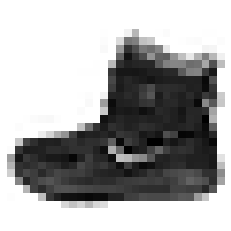

In [13]:
showImage(X_train[0])

In [14]:
y_train[0]

9

## Feature Scale the dataset

In [15]:
np.random.seed(42)

In [16]:
shuffle_index = np.random.permutation(X_train.shape[0])

In [17]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Train various models

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
from sklearn.metrics import f1_score

In [24]:
#1. softmax regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# using Softmax Regression (multi-class classification problem)

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm

In [27]:
log_clf.fit(X_train_scaled,y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

In [29]:
y_train[0]

8

In [30]:
y_train_predict[0]

8

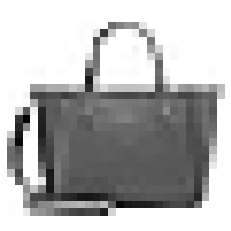

In [31]:
showImage(X_train[0])

In [32]:
y_train_predict = log_clf.predict(X_train_scaled)

In [33]:
log_accuracy = accuracy_score(y_train, y_train_predict)

log_precision = precision_score(y_train, y_train_predict, average='weighted')

log_recall = recall_score(y_train, y_train_predict, average='weighted')

log_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [34]:
print("accuracy score - ", np.round(log_accuracy,4), "\nprecision score - ", \
      np.round(log_precision,4),"\nrecall score - ", np.round(log_recall,4), "\nf1_score - ",\
      np.round(log_f1_score,4))

accuracy score -  0.8775 
precision score -  0.8766 
recall score -  0.8775 
f1_score -  0.8769


In [35]:
#2. Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

# Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost

In [38]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [40]:
y_train[0]

8

In [41]:
y_train_predict[0]

8

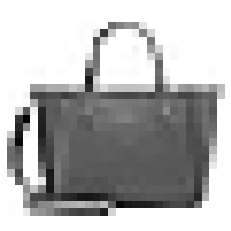

In [42]:
showImage(X_train[0])

In [43]:
y_train_predict = rnd_clf.predict(X_train)

In [44]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)

rnd_precision = precision_score(y_train, y_train_predict, average='weighted')

rnd_recall = recall_score(y_train, y_train_predict, average='weighted')

rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [45]:
print("accuracy score - ", np.round(log_accuracy,4), "\nprecision score - ", \
      np.round(log_precision,4),"\nrecall score - ", np.round(log_recall,4), "\nf1_score - ",\
      np.round(log_f1_score,4))

accuracy score -  0.8775 
precision score -  0.8766 
recall score -  0.8775 
f1_score -  0.8769


## Select the model

In [46]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
def display_scores(scores):
    print("scores - ", scores)
    print("mean_score - ", np.round(np.mean(scores),4))
    print("standard_deviation - ", np.round(np.std(scores),4))

In [49]:
#1. Softmax

In [50]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

In [51]:
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [52]:
display_scores(log_cv_scores)

scores -  [0.84905 0.84825 0.84395]
mean_score -  0.8471
standard_deviation -  0.0022


In [53]:
log_cv_accuracy = log_cv_scores.mean()

In [54]:
y_train_pred = cross_val_predict(log_clf,X_train_scaled,y_train,cv=3)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [55]:
confusion_matrix(y_train,y_train_pred)

array([[4872,   27,  119,  275,   31,    8,  587,    3,   71,    7],
       [  22, 5802,   21,  114,   14,    1,   21,    3,    1,    1],
       [ 100,   16, 4477,   65,  722,    8,  564,    4,   43,    1],
       [ 227,   83,   71, 5209,  193,    3,  180,    4,   26,    4],
       [  22,   13,  549,  190, 4669,    3,  521,    1,   32,    0],
       [   5,    4,    4,    2,    0, 5521,    3,  280,   54,  127],
       [ 886,   19,  704,  218,  592,    3, 3470,    3,  100,    5],
       [   0,    0,    1,    0,    0,  220,    0, 5555,   15,  209],
       [  58,    6,   40,   45,   28,   52,  123,   30, 5599,   19],
       [   0,    1,    0,    2,    0,  108,    0,  231,    7, 5651]])

In [56]:
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')

In [57]:
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')

In [58]:
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [59]:
#2. Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rnd_cv_scores = cross_val_score(rnd_clf,X_train, y_train, cv=3, scoring="accuracy")

In [62]:
display_scores(rnd_cv_scores)

scores -  [0.85155 0.84745 0.84585]
mean_score -  0.8483
standard_deviation -  0.0024


In [63]:
rnd_cv_accuracy = rnd_cv_scores.mean()

In [64]:
y_train_pred = cross_val_predict(rnd_clf,X_train,y_train,cv=3)

In [65]:
confusion_matrix(y_train,y_train_pred)

array([[5081,    2,  108,  334,   45,    5,  358,    0,   67,    0],
       [  18, 5691,   57,  199,    8,    1,   21,    0,    5,    0],
       [  39,    2, 4439,   59, 1098,    0,  325,    0,   38,    0],
       [ 147,   18,   65, 5444,  195,    0,  117,    0,   14,    0],
       [   9,    7,  493,  339, 4842,    1,  283,    0,   25,    1],
       [   1,    0,    2,    2,    0, 5502,    0,  351,   32,  110],
       [1195,    8,  831,  198,  709,    2, 2947,    0,  110,    0],
       [   0,    0,    0,    0,    0,   88,    0, 5538,   12,  362],
       [  12,    5,   48,   31,   35,   16,   50,   20, 5777,    6],
       [   1,    0,    2,    4,    2,   52,    1,  290,   12, 5636]])

In [66]:
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')

In [67]:
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')

In [68]:
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [69]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("log_cv_accuracy:", log_cv_accuracy)
print("log_cv_precision:", log_cv_precision)
print("log_cv_recall:", log_cv_recall)
print("log_cv_f1_score:", log_cv_f1_score)

print("=== Random Forest === ")
display_scores(rnd_cv_scores)
print("rnd_cv_accuracy:", rnd_cv_accuracy)
print("rnd_cv_precision:", rnd_cv_precision)
print("rnd_cv_recall :", rnd_cv_recall )
print("rnd_cv_f1_score:", rnd_cv_f1_score)

=== Softmax === 
scores -  [0.84905 0.84825 0.84395]
mean_score -  0.8471
standard_deviation -  0.0022
log_cv_accuracy: 0.8470833333333333
log_cv_precision: 0.8458694883855286
log_cv_recall: 0.8470833333333333
log_cv_f1_score: 0.846272242627941
=== Random Forest === 
scores -  [0.85155 0.84745 0.84585]
mean_score -  0.8483
standard_deviation -  0.0024
rnd_cv_accuracy: 0.8482833333333334
rnd_cv_precision: 0.8482875291253137
rnd_cv_recall : 0.8482833333333333
rnd_cv_f1_score: 0.8452574403288833


## Fine Tune the model

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=0.99) # percentage of variance to be explained

In [96]:
X_train_reduced = pca.fit_transform(X_train)

In [97]:
pca.n_components_

459

In [98]:
np.sum(pca.explained_variance_ratio_)

0.9900347820630977

In [99]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

In [100]:
import matplotlib
import matplotlib.pyplot as plt

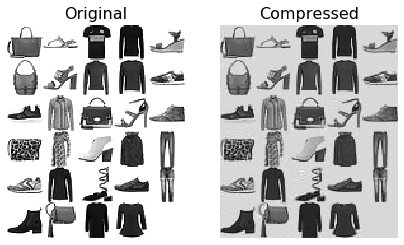

In [101]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [112]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10,15],
    }]
# "estimator_name"__"parameter_name" : []

In [113]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 ,\
                                 random_state=42)

In [114]:
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)

In [115]:
voting_clf_grid_search = VotingClassifier(
    estimators=[("lr",log_clf_ens),("rf",rnd_clf_ens)],voting="soft")

In [116]:
grid_search = GridSearchCV( voting_clf_grid_search, param_grid, cv=3, \
                           scoring='neg_mean_squared_error')

In [117]:
grid_search.fit(X_train_reduced,y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

GridSearchCV(cv=3, error_score=nan,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=10,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='multinomial',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                        

In [118]:
grid_search.best_params_

{'lr__C': 5,
 'lr__multi_class': 'multinomial',
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [119]:
grid_search.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                          

In [120]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.380380382358428 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3714651532819442 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


## Evaluate the model

In [130]:
final_model = grid_search.best_estimator_

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [132]:
X_test_reduced = pca.transform(X_test)

In [133]:
y_test_predict = final_model.predict(X_test_reduced)

In [134]:
confusion_matrix(y_test,y_test_predict)

array([[828,   3,  15,  45,   4,   3,  88,   1,  13,   0],
       [  4, 957,   5,  25,   5,   0,   4,   0,   0,   0],
       [ 20,   3, 742,  12, 125,   3,  82,   2,  11,   0],
       [ 31,   9,  17, 879,  26,   1,  32,   0,   5,   0],
       [  0,   1, 106,  38, 771,   3,  73,   1,   7,   0],
       [  0,   0,   0,   1,   0, 925,   0,  47,   6,  21],
       [156,   2, 125,  39,  96,   2, 553,   0,  27,   0],
       [  0,   0,   0,   0,   0,  32,   0, 933,   0,  35],
       [  4,   1,   2,  11,   4,   6,  15,   7, 947,   3],
       [  0,   0,   0,   0,   0,  14,   0,  42,   2, 942]])

In [135]:
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')

In [136]:
print("final_accuracy - ",final_accuracy)
print("final_precision - ",final_precision)
print("final_recall - ", final_recall)
print("final_f1_score - ", final_f1_score)

final_accuracy -  0.8477
final_precision -  0.8455248386644493
final_recall -  0.8477
final_f1_score -  0.8460425762332676


In [137]:
y_test[0]

9

In [138]:
y_test_predict[0]

9

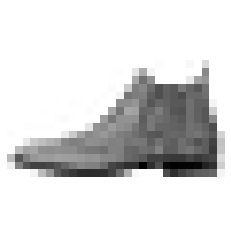

In [139]:
showImage(X_test[0])